<div>
    <img src="https://www.universitylanguageschool.com/wp-content/uploads/2017/04/wdlwordle2.jpg" width="800">
</div>

# Why Is English So Difficult?

If you've ever tried learning a language, you have no doubt hit a wall and become frustrated at how difficult it can be to retain, understand, and utilize what you've learned. For native English speakers, the hardest languages to learn are Arabic, Japanase, Korean, and Mandarin Chinese. However, if you were born in a non-English speaking country, you might think that English is the hardest language to learn. [Why](https://wordcounter.net/blog/2017/01/05/102792_english-hardest-language.html) would that be? According to [Babbel.com](https://www.babbel.com/en/magazine/the-10-most-spoken-languages-in-the-world), English is the third most spoken language with roughly **370+ million** native speakers. The #1 and #2 positions would go to Chinese (**1.3 billion**) and Spanish (**471 million**), respectively. According to [Ethnologue](https://www.ethnologue.com/), English is the language with the largest number of second language speakers, with over **1.08 billion**! That's roughly 4x more than the next highest language!

<figure>
    <img src="https://i.imgur.com/LKTXzEZ.png">
    <figcaption align = "center">Fig.1 - List of First & Second Language Speakers</figcaption>
</figure>

And yet English, given its long [history](https://www.psychologytoday.com/us/blog/language-in-the-mind/201702/why-english-is-such-difficult-language-learn), is often stated as being one of the most [confusing](https://owlcation.com/humanities/Examples-Of-Why-The-English-Language-Is-So-Confusing), [non-sensical](https://reword.ca/5-examples-of-how-the-english-language-makes-no-sense-at-all/) languages in the world. I have some experience in this field, as I was an English teacher in South Korea for 6 years. I have taught everything from kindergartners to high-schoolers, and I have heard every complaint and frustration imaginable. I know my adult Korean friends also express a certain level of disdain when it comes to learning English because to them it simply makes [no](https://thelanguagedoctors.org/is-english-hard-to-learn/#:~:text=The%20English%20language%20is%20widely,both%20learners%20and%20native%20speakers.) [sense](https://www.vox.com/2015/7/21/9003299/spelling-reform).

I want to know what areas of English learners struggle with the most. To do that, I will be digging into the [English Stack Exchange](https://english.stackexchange.com/) website to query its database and analyze the results. I hope to gain some insights on what kinds of areas are asked about the most.

## Project Goals
* Query database and gather data
* Clean, refine, and organize data
* Analyze data to find most common trouble areas
* Investigate if there are any unique patterns or correlations
* Incorporate any third-party information
* Create helpful visualizations

# Initial Exploration of the English Stack Exchange

By navigating to the home of the English Stack Exchange we can get familiar with its structure.

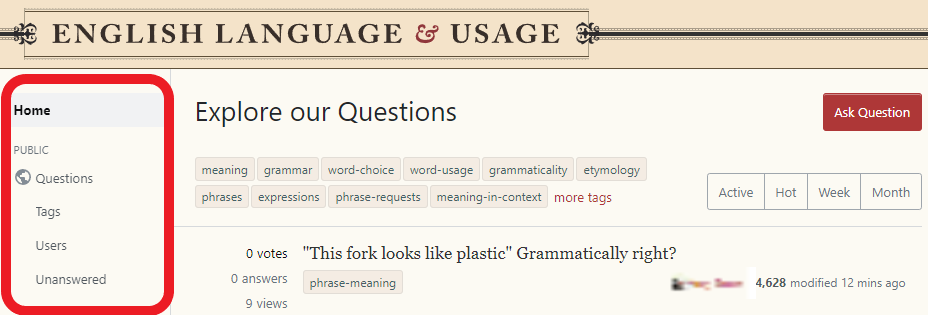

We can see on the far left that there are dedicated sections for Questions, Tags, Users, and Unanswered questions. On every Stack Exchange site users can "tag" their posts with a relevant tag, so that others can find it easier. This will be very helpful in our project. You can have a limit of 5 tags per post, so it encourages people to think about the essence of their question, instead of spamming every tag on every post. We can easily see a sample of tags from the image: meaning, grammar, phrases, etc. If we click on the Tags button on the left, it takes us to a page with more in-depth explanation of each tag.

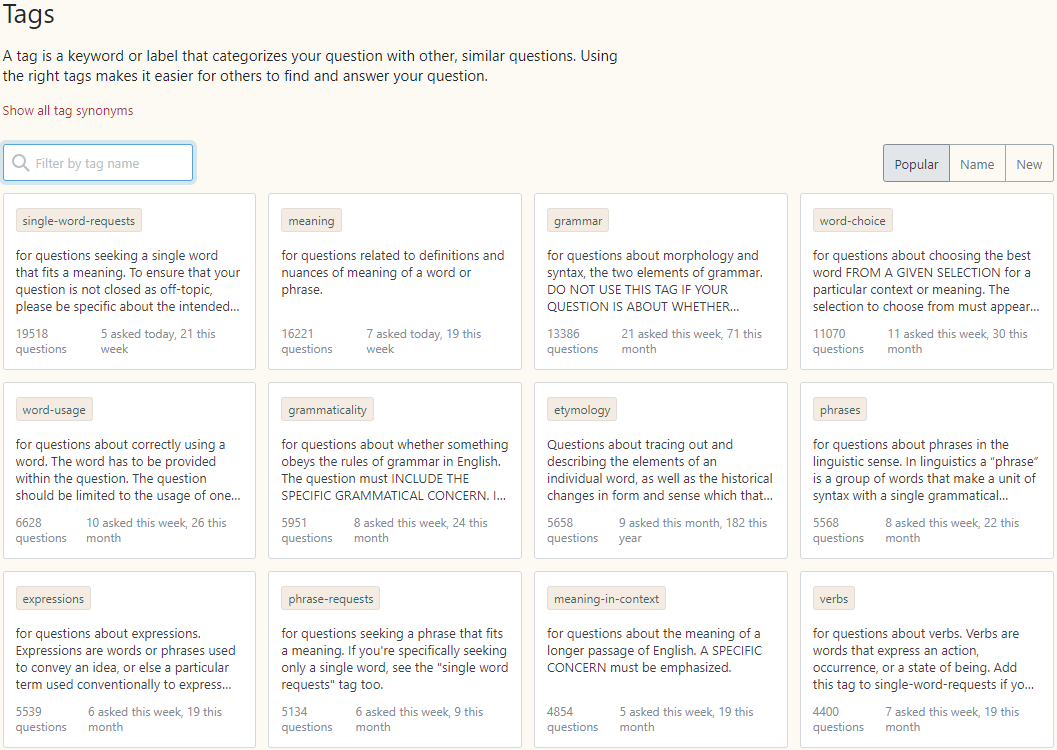

This is a fantastic resource for us, as we'll be using it extensively. Every Stack Exchange website provides a [public data base](https://data.stackexchange.com/english/query/new) that users can query via SQL commands. We can even save the query results to a .csv file, and import them as a pandas DataFrame for use with our project.

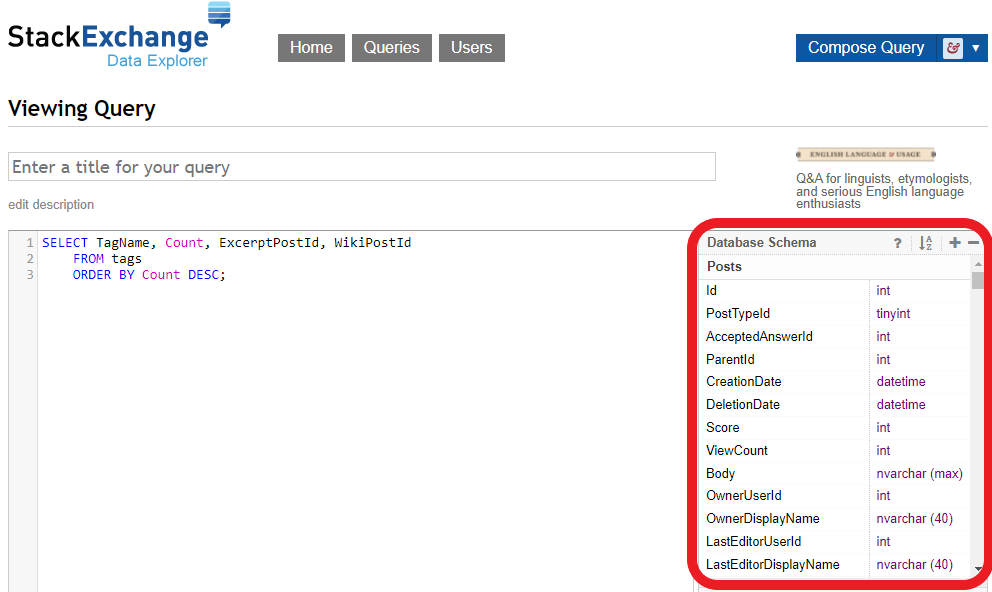

Above is what the query page looks like. On the right, we can see a detailed schema of how the database is laid out, as well as the datatype for each attribute. We can see all kinds of relevant information that we can query for Posts, Comments, Users - basically everything we could ever need from this site. If we run the following SQL query, we will get back all the information from `tags` (the following is just a snippet of all the tags).

```
  SELECT *
    FROM tags
ORDER BY Count DESC;
```
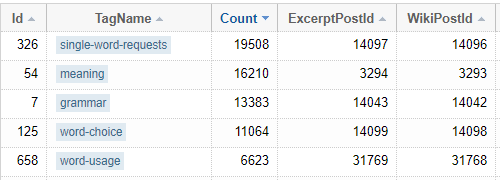

We can clearly see the `TagName` and `Count` values, which will be immensely helpful for us. We can also see that `single-word-requests` is the most used tag, followed by `meaning`, and `grammar`. So right away we can see that definitions of words/phrases, and grammar are the most common areas that people are asking about. If we run the following query, we can see information on the `PostTypes`:

```
SELECT *
  FROM PostTypes;
```

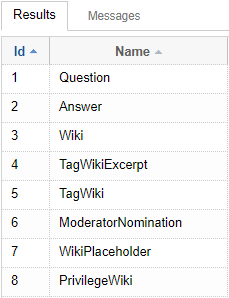

So we can see that there are eight types of Posts. The first two are obvious, but the remaining six aren't especially clear - let's keep digging. If we look at the database schema under `Posts` we can see that it contains a lot of relevant, useful information to us:

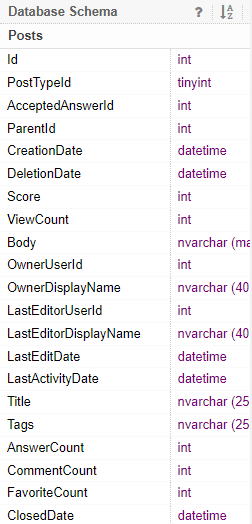

We can clearly see from the above that each post made on the StackExchange contains the following information:

* `Id` - a unique identifier for each post.
* `PostTypeId` - an identification number for the type of post.
* `CreationDate` - the time of creation of the post.
* `Score` - the score (or upvotes) of the post.
* `ViewCount` - how many times the post was viewed.
* `Tags` - the relevant tags that were used for the question.
* `AnswerCount` - how many answers the question received (only for question posts)
* `FavoriteCount` - how many times the question was favored (only for question posts)

Since we have seen that there are eight different types of posts, lets go ahead and see how many of them there are by running the following query:

```
SELECT PostTypeId,
       COUNT(*) as Num_posts
  FROM Posts
 GROUP BY PostTypeId;
```

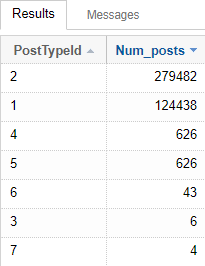

We know from our earlier query that an ID of 1 = `Question`, and an ID of 2 = `Answer`. Interestingly, there are more than twice as many `Answers` as there are `Questions`. Since we really only care about these two types of `Posts`, the others are inconsequential.

Finally, we want to keep our data relatively recent (at the time of writing it is March 2022), so we can do one more query against the StackExchange to find all the relevant information from the past year (March 2021 - March 2022).

```
SELECT Id,
       PostTypeId,
       CreationDate,
       Score,
       ViewCount,
       Tags,
       AnswerCount,
       FavoriteCount
  FROM Posts
  WHERE PostTypeId = 1 AND CreationDate BETWEEN '3/17/2021' AND '3/17/2022'
 ORDER BY CreationDate;
 ```
 
 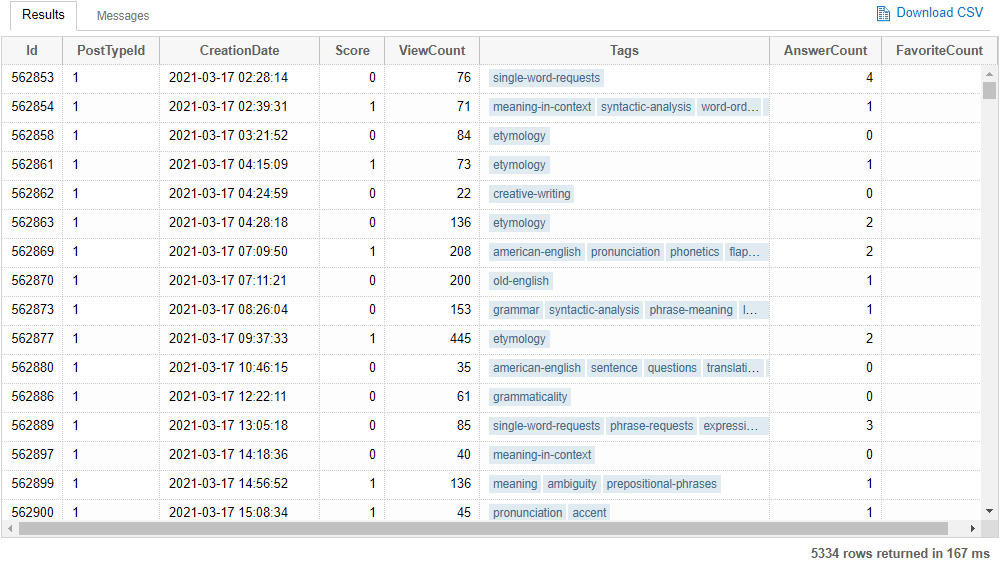
 
 This gives us a dataset of 5,300+ questions to analyze. We can download the query result as a .csv and import it using pandas.
 
 # Import Libraries & Tools

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from functools import reduce

# Initial Data Exploration

In [2]:
data = pd.read_csv('QueryResults.csv', parse_dates=["CreationDate"])
data.head()

,Id,PostTypeId,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
0,562853,1,2021-03-17 02:28:14,0,76,<single-word-requests>,4,NaN
1,562854,1,2021-03-17 02:39:31,1,71,<meaning-in-context><syntactic-analysis><word-...,1,NaN
2,562858,1,2021-03-17 03:21:52,0,84,<etymology>,0,NaN
3,562861,1,2021-03-17 04:15:09,1,73,<etymology>,1,NaN
4,562862,1,2021-03-17 04:24:59,0,22,<creative-writing>,0,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5334 entries, 0 to 5333
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Id             5334 non-null   int64         
 1   PostTypeId     5334 non-null   int64         
 2   CreationDate   5334 non-null   datetime64[ns]
 3   Score          5334 non-null   int64         
 4   ViewCount      5334 non-null   int64         
 5   Tags           5334 non-null   object        
 6   AnswerCount    5334 non-null   int64         
 7   FavoriteCount  772 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(5), object(1)
memory usage: 333.5+ KB


# Data Cleaning
## Missing Values
From the above we can quickly see that our `FavoriteCount` column has a lot of null values. We only have 772 values for that column, which is **~14.4%** of the total data for that column. `FavoriteCount` simply represents the number of times another user "favorited" that question, signifying that they thought it was particularly helpful, useful, etc. A missing value for this column simply means no users "favorited" the post, so instead of removing all those rows, we can instead replace the missing values with zeros.

In [4]:
#fill in missing values with a zero
data.fillna(0, inplace=True)

#change data type to int64
data["FavoriteCount"] = data["FavoriteCount"].astype('int64')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5334 entries, 0 to 5333
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Id             5334 non-null   int64         
 1   PostTypeId     5334 non-null   int64         
 2   CreationDate   5334 non-null   datetime64[ns]
 3   Score          5334 non-null   int64         
 4   ViewCount      5334 non-null   int64         
 5   Tags           5334 non-null   object        
 6   AnswerCount    5334 non-null   int64         
 7   FavoriteCount  5334 non-null   int64         
dtypes: datetime64[ns](1), int64(6), object(1)
memory usage: 333.5+ KB


## Removing Redundant Information

Since our initial query specified that we only want PostTypeId to be 1, we can go ahead and remove that column from our data, as it no longer serves a purpose.

In [5]:
data.drop('PostTypeId', axis=1, inplace=True)

## Cleaning "Tags" Column

In [6]:
#shows us the data type of each tag
data["Tags"].apply(lambda t: type(t)).value_counts()

<class 'str'>    5334
Name: Tags, dtype: int64

We can see that each value in the column is a string. On Stack Exchange, each post can have a maximum of five tags. We could have five separate columns for each tag, but let's leave the structure alone for now. Instead, let's clean up the strings to make them easier to read.

In [7]:
data['Tags'].head(10)

0                               <single-word-requests>
1    <meaning-in-context><syntactic-analysis><word-...
2                                          <etymology>
3                                          <etymology>
4                                   <creative-writing>
5                                          <etymology>
6    <american-english><pronunciation><phonetics><f...
7                                        <old-english>
8    <grammar><syntactic-analysis><phrase-meaning><...
9                                          <etymology>
Name: Tags, dtype: object

We need to remove the angled brackets (<>) and put a space between each tag. The [str.replace()](https://pandas.pydata.org/docs/reference/api/pandas.Series.str.replace.html) and [str.split()](https://pandas.pydata.org/docs/reference/api/pandas.Series.str.split.html) methods will do the trick.

In [8]:
data['Tags'] = data['Tags'].str.replace(r'^<|>$','', regex=True).str.split('><')
data['Tags'].head(10)

0                               [single-word-requests]
1    [meaning-in-context, syntactic-analysis, word-...
2                                          [etymology]
3                                          [etymology]
4                                   [creative-writing]
5                                          [etymology]
6    [american-english, pronunciation, phonetics, f...
7                                        [old-english]
8    [grammar, syntactic-analysis, phrase-meaning, ...
9                                          [etymology]
Name: Tags, dtype: object

# Data Analysis
## Base Statistics

Now that they're cleaned up a bit, let's get some more information on this data. Let's see some basic statistics first.

In [9]:
data[['Score', 'ViewCount', 'AnswerCount', 'FavoriteCount']].describe()

,Score,ViewCount,AnswerCount,FavoriteCount
count,5334.000000,5334.000000,5334.000000,5334.000000
mean,1.079115,209.965504,1.280652,0.171729
std,3.377788,715.868883,1.613560,0.518674
min,-5.000000,4.000000,0.000000,0.000000
25%,0.000000,37.000000,0.000000,0.000000
50%,0.000000,57.000000,1.000000,0.000000
75%,1.000000,95.000000,2.000000,0.000000
max,59.000000,13199.000000,25.000000,11.000000


From the above we can make a few observations:
* **Scores** range from -5 to 59
* **ViewCounts** range from 4 to 13,199
* **AnswerCounts** range from 0 to 25
* **FavoriteCounts** range from 0 to 11

## Tag Counts

Now let's count how many times each tag was used. We can create a dictionary where the key is the tag, and the value is the number of times it was used.

In [10]:
#get tag count
tag_count = {}
for row in data["Tags"]:
    for tag in row:
        if tag not in tag_count:
            tag_count[tag] = 0
        tag_count[tag] += 1

#function to create df from dictionary
def df_from_dict(dictionary, col):
    #convert to df
    df = pd.DataFrame.from_dict(dictionary, orient='index')
    df.rename(columns={0:col}, inplace=True)

    #sorts by `col`
    df = df.sort_values(col,ascending=False)
    return df, df.head(20)

tag_used, top20_tags = df_from_dict(tag_count, 'Count')
top20_tags

,Count
single-word-requests,823
grammar,822
meaning,586
word-choice,318
word-usage,284
grammaticality,240
meaning-in-context,229
phrases,209
expressions,205
phrase-requests,196


In [11]:
#function to plot horizontal bar chart of data[x_data]
def plot_dist(data, x_data, title='', subtitle=''):
    #figure setup
    fig = plt.figure(figsize=(15,8))
    
    #margin setup for titles & signature
    t_margin  = data[x_data].max()*-0.15
    st_margin = data[x_data].max()*-0.17
    
    #plot
    ax = sns.barplot(data=data, x=x_data, y=data.index, palette='flare')
    
    #vertical line
    ax.axvline(x=0, color='black', linewidth=10, alpha=.7)
    ax.yaxis.label.set_visible(False)
    ax.xaxis.label.set_visible(False)

    #title & subtitle
    ax.text(x=t_margin, y=-2.5, s=title, fontsize=28, weight='bold', alpha=.75)
    ax.text(x=t_margin, y=-1.4, s=subtitle, fontsize=21, alpha=.85)
    
    #signature bar
    ax.text(x=st_margin, y=21,
            s=' ©NoahGampe' + ' '*170 + ' Source: English Stack Exchange',
            fontsize=14, color='#f0f0f0', backgroundcolor='grey')
    
    plt.show()

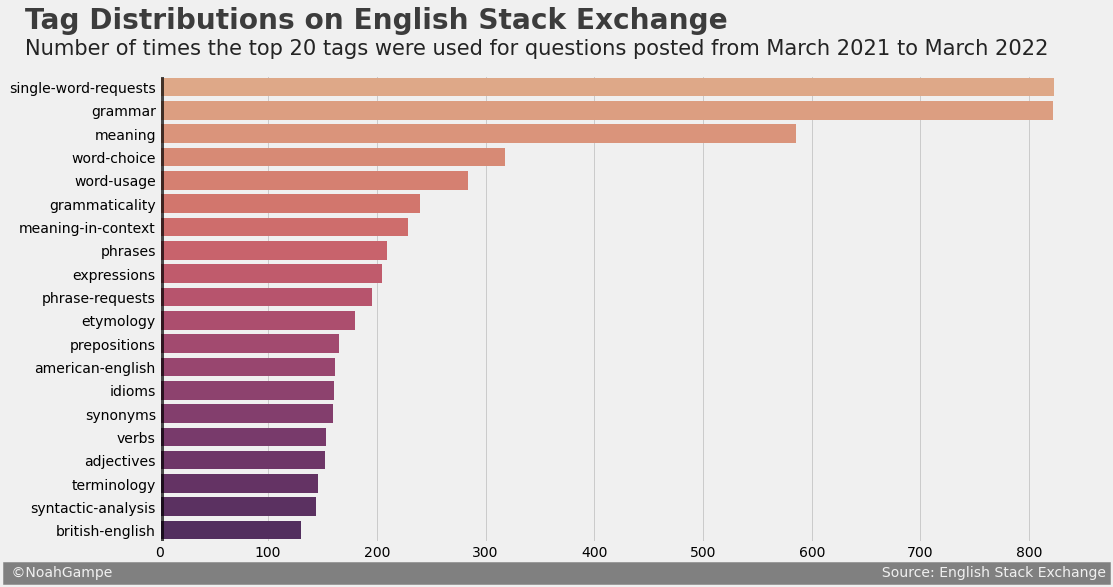

In [12]:
title = 'Tag Distributions on English Stack Exchange'
subtitle = 'Number of times the top 20 tags were used for questions posted from March 2021 to March 2022'
plot_dist(top20_tags, 'Count', title, subtitle)

At this point we can logically assume that the number of times a tag was added to a post strongly affects things like `Score`, `ViewCount`, `AnswerCount`, and `FavoriteCount`. We'll inspect those shortly, but first we'll create the dataframes for each of the columns in interest and merge them into one dataframe, preserving all the entries. Additionally, we'll create the top 20 tags dataframes for these columns (using the functions we just defined).

In [13]:
#function for finding popular tags by column
def find_popular_tags(column_name, new_column_name):
    #dictionary for all the tags
    tags_dict = {}
    for _, row in data.iterrows():
        tags = row['Tags']
        popularity_measure = row[column_name]
        for tag in tags:
            if tag not in tags_dict:
                tags_dict[tag] = 0
            tags_dict[tag] += popularity_measure
            
    #create dataframe from the dictionary, sorted in descending order
    tags_df, top20_df = df_from_dict(tags_dict, new_column_name)            
    return tags_df, top20_df

tag_scores, top20_scores = find_popular_tags('Score', 'Scores')
tag_views, top20_views = find_popular_tags('ViewCount', 'Views')
tag_answers, top20_answers = find_popular_tags('AnswerCount', 'Answers')
tag_favorites, top20_favorites = find_popular_tags('FavoriteCount', 'Favorites')

all_dfs = [tag_used, tag_scores, tag_views, tag_answers, tag_favorites]
tags_merged = pd.concat(all_dfs, axis=1)

In [14]:
tags_merged.head(10)

,Count,Scores,Views,Answers,Favorites
single-word-requests,823,1292,265433,1792,199
grammar,822,445,89192,747,75
meaning,586,703,141274,713,85
word-choice,318,193,50120,414,37
word-usage,284,245,43035,318,45
grammaticality,240,89,18232,235,24
meaning-in-context,229,163,41111,253,30
phrases,209,220,46957,304,29
expressions,205,339,59578,296,46
phrase-requests,196,400,89825,509,60


## Tag Views

We can see that the two most often used tags are `single-word-requests` and `grammar` - arguably two areas of English that are more than confusing for learners. Also, some of the tags may seem a little redundant. For example, `meaning` and `meaning-in-context` both pertain to what a word or phrase means. Similarly, `grammar` and `grammaticality` would both focus on grammar. Before we dig into that issue further, let's repeat this same process based on ViewCount instead.

In [15]:
top20_views

,Views
single-word-requests,265433
meaning,141274
phrase-requests,89825
grammar,89192
idioms,87717
etymology,86071
expressions,59578
idiom-requests,55343
american-english,54637
word-choice,50120


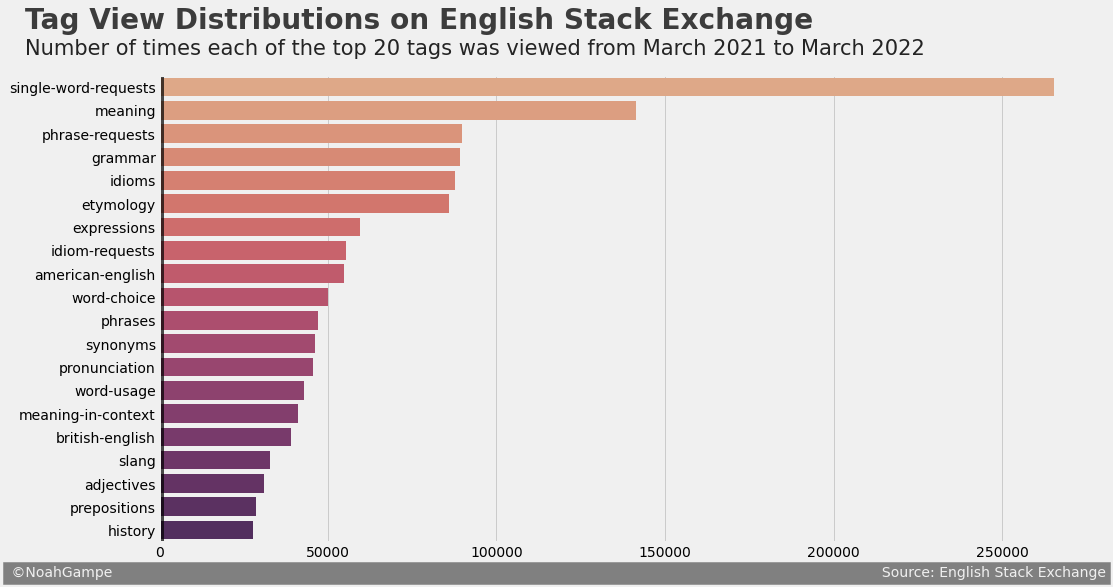

In [16]:
title = 'Tag View Distributions on English Stack Exchange'
subtitle = 'Number of times each of the top 20 tags was viewed from March 2021 to March 2022'
plot_dist(top20_views, 'Views', title, subtitle)

We can clearly see that `single-word-requests` has roughly **265,000** views, almost double that of the next highest-viewed tag, `meaning`. This is rather insightful, as it implies that a lot of people are simply seeking a single word that fits a meaning. That is a very common encounter when it comes to learning languages, one that I've asked many times about the Korean language, so it would definitely make sense that it happens with English as well.

## Tag Scores

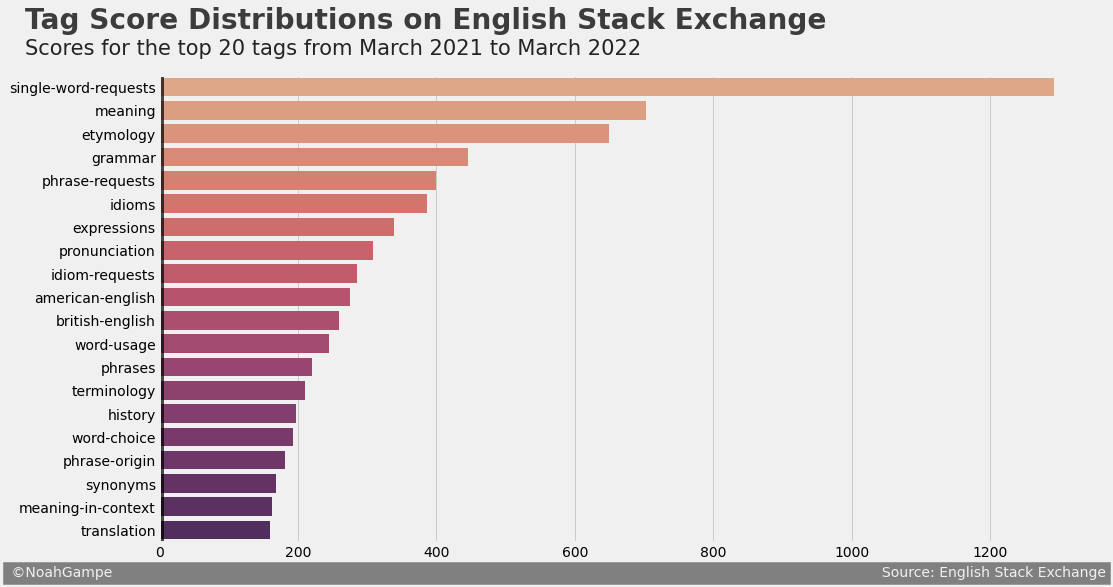

In [17]:
title = 'Tag Score Distributions on English Stack Exchange'
subtitle = 'Scores for the top 20 tags from March 2021 to March 2022'
plot_dist(top20_scores, 'Scores', title, subtitle)

It seems that `single-word-requests` is by far the highest-viewed, *and* the highest-scored tag. It's important to note that even though `single-word-requests` dominates in the score category, the overall number of scores is rather low for an entire years worth of questions. It's possible that people are not voting for the correct answers, or perhaps they simply don't care about the score system.

## Tag Answers

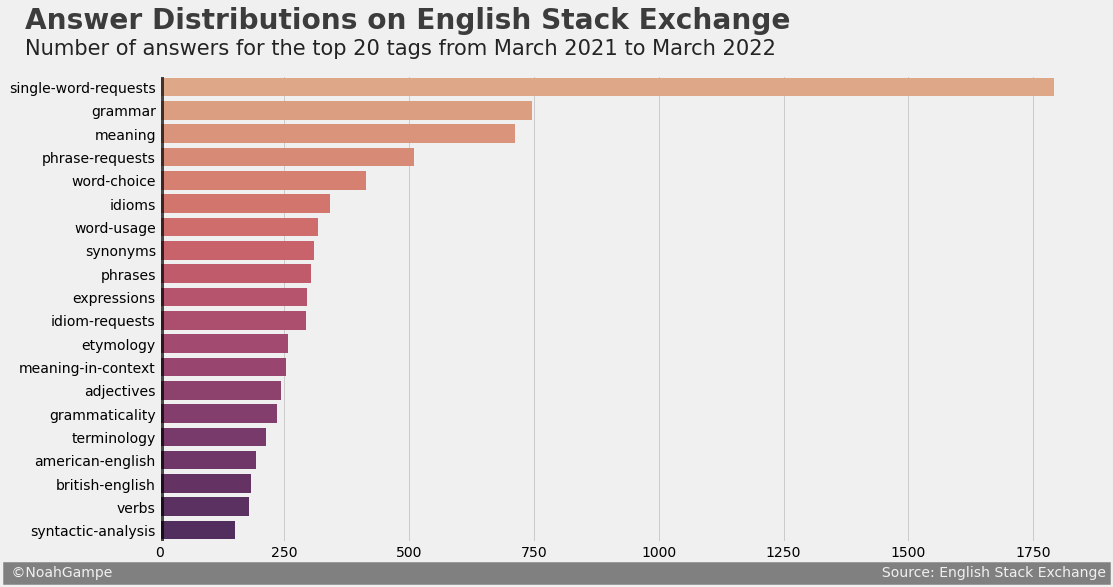

In [18]:
title = 'Answer Distributions on English Stack Exchange'
subtitle = 'Number of answers for the top 20 tags from March 2021 to March 2022'
plot_dist(top20_answers, 'Answers', title, subtitle)

Again, `single-word-requests` is the tag with the most answers *by far*, more than doubling that of the next highest tag, `grammar`. This is lining up with our previous assumption that the number of times a tag gets used affects the other attributes (views, scores, answers, etc.)

## Tag Favorites

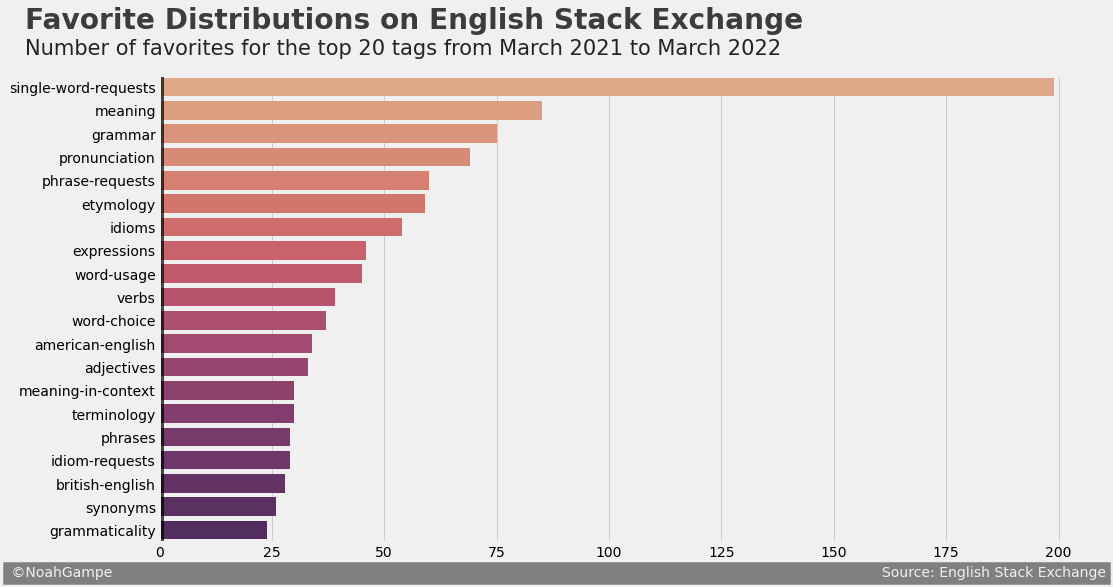

In [19]:
title = 'Favorite Distributions on English Stack Exchange'
subtitle = 'Number of favorites for the top 20 tags from March 2021 to March 2022'
plot_dist(top20_favorites, 'Favorites', title, subtitle)

A "favorite" is when a user finds a question/answer particularly helpful. It is a way for them to "save" answers for reference later. Here we can clearly see that `single-word-requests` is again the most favorited tag, with just under 200 favorites (roughly 25% of the number of times it was used).

## Feature Correlation

How strongly are these features correlated with one another? We can plot a simple heatmap and find out.

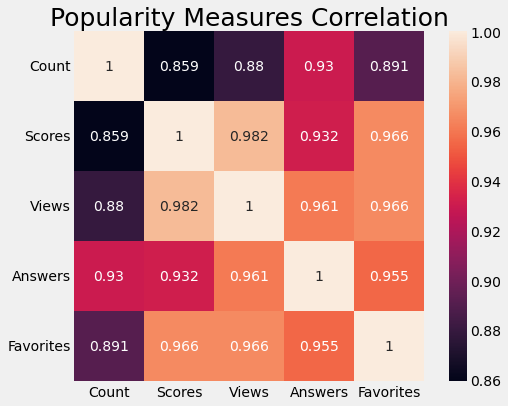

In [20]:
#plot correlation heatmap
fig, ax = plt.subplots(figsize=(8,6))
ax = sns.heatmap(tags_merged.corr(), annot=True, fmt='.3g', square=True, cmap='rocket')
ax.set_title('Popularity Measures Correlation', fontsize=25)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
ax.tick_params(bottom=False, left=False)
plt.show()

We can see that all of the features are strongly correlated, which means our assumption was correct. This means that the topics (reflected by the tag names) that stir the biggest interest among people asking questions usually attract more views and gather more answers, scores, and favorites. The strongest correlation is between Views and Scores - which makes sense because the more people see a topic, the more likely they will upvote it, thus increasing its score. Interestingly enough, the "weakest" correlation is between Count and Scores. This sounds a bit opposite from our initial assumption (that the more a tag gets used, the higher the other metrics will be), however it's just that the number of Views, Answers, and Favorites had a bigger impact on the overall score of a given tag.

## Which Tags Appear in All of the Top 20 Dataframes?

In [21]:
#list of the top20 dataframes
df_top20 = [top20_tags, top20_scores, top20_views, top20_answers, top20_favorites]

#creating merged dataframe for all the top20 dataframes
top20_merged = reduce(lambda left,right: pd.DataFrame.join(left, right, how='inner'), df_top20)

print('Number of tags occuring in all the top20 dataframes: ', len(top20_merged))
top20_merged

Number of tags occuring in all the top20 dataframes:  14


,Count,Scores,Views,Answers,Favorites
single-word-requests,823,1292,265433,1792,199
grammar,822,445,89192,747,75
meaning,586,703,141274,713,85
word-choice,318,193,50120,414,37
word-usage,284,245,43035,318,45
meaning-in-context,229,163,41111,253,30
phrases,209,220,46957,304,29
expressions,205,339,59578,296,46
phrase-requests,196,400,89825,509,60
etymology,180,649,86071,257,59


Hence, in all the top20 dataframes, there are 14 common tags, which confirms once again a very strong correlation between the popularity measures. We'd like to plot these 14 popular tags together with the corresponding values of their popularity measures, but since they all have quite different ranges, it's necessary to normalize them first. This will put them all on a similar "scale" (from 0 to 1) so that the plots will behave nicely.

In [22]:
#normalizing the merged dataframe
top20_merged_normalized = top20_merged.copy()
indexes = top20_merged_normalized.index.tolist()
columns = top20_merged_normalized.columns.tolist()
for column in columns:
    top20_merged_normalized[column] /= top20_merged_normalized[column].abs().max()
    
top20_merged_normalized

,Count,Scores,Views,Answers,Favorites
single-word-requests,1.000000,1.000000,1.000000,1.000000,1.000000
grammar,0.998785,0.344427,0.336025,0.416853,0.376884
meaning,0.712029,0.544118,0.532240,0.397879,0.427136
word-choice,0.386391,0.149381,0.188824,0.231027,0.185930
word-usage,0.345079,0.189628,0.162131,0.177455,0.226131
meaning-in-context,0.278250,0.126161,0.154883,0.141183,0.150754
phrases,0.253949,0.170279,0.176907,0.169643,0.145729
expressions,0.249089,0.262384,0.224456,0.165179,0.231156
phrase-requests,0.238153,0.309598,0.338409,0.284040,0.301508
etymology,0.218712,0.502322,0.324266,0.143415,0.296482


In [23]:
#creating a melted dataframe from the merged dataframe for better plotting
top20_melted = pd.melt(top20_merged_normalized, value_vars=columns,
                       var_name='Metric', value_name='Value', ignore_index=False)
top20_melted

,Metric,Value
single-word-requests,Count,1.000000
grammar,Count,0.998785
meaning,Count,0.712029
word-choice,Count,0.386391
word-usage,Count,0.345079
...,...,...
etymology,Favorites,0.296482
american-english,Favorites,0.170854
idioms,Favorites,0.271357
synonyms,Favorites,0.130653


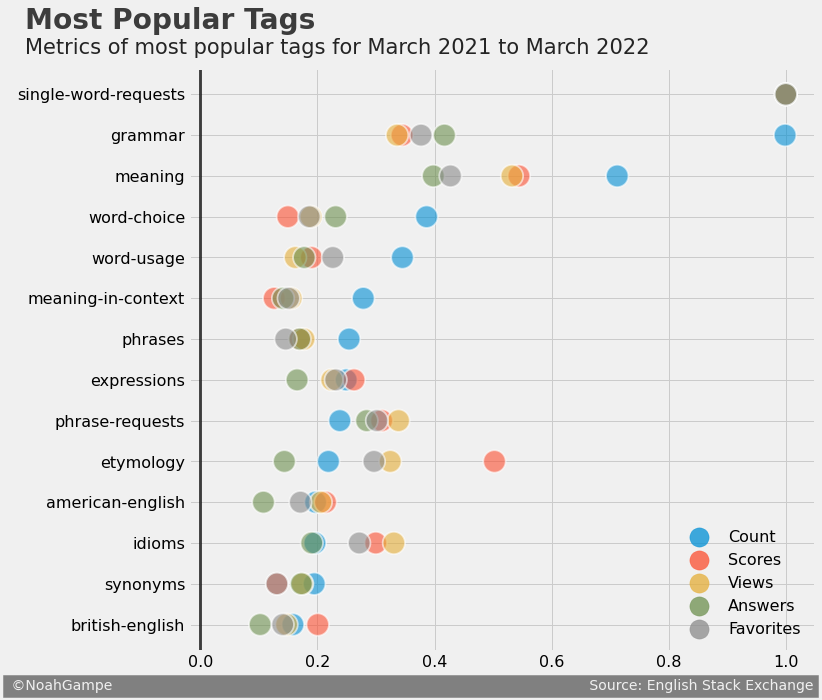

In [24]:
def plot_metric_comp(df):    
    #creating a dot plot for the most popular tags
    fig = plt.subplots(figsize=(10,10))

    #plot
    ax = sns.scatterplot(data=df, x='Value', y=df.index, hue='Metric', s=500, alpha=0.6)
    ax.set_xlim(-0.02,1.05)
    
    #margin setup for titles & signature
    t_margin  = -0.30
    st_margin = -0.33

    #vertical line
    ax.axvline(x=0, color='black', linewidth=3, alpha=.7)

    #legend
    leg = ax.legend(loc=4, fontsize=16, markerscale = 3.2, frameon=False)
    for lh in leg.legendHandles: 
        lh.set_alpha(0.75)
    
    #labels & ticks
    ax.yaxis.label.set_visible(False)
    ax.xaxis.label.set_visible(False)
    ax.tick_params(axis='x', labelsize=16)
    ax.tick_params(axis='y', labelsize=16)

    #title & subtitle
    title = 'Most Popular Tags'
    subtitle = 'Metrics of most popular tags for March 2021 to March 2022'
    ax.text(x=t_margin, y=-1.6, s=title, fontsize=28, weight='bold', alpha=.75)
    ax.text(x=t_margin, y=-1.0, s=subtitle, fontsize=21, alpha=.85)

    #signature bar
    ax.text(x=st_margin, y=14.6,
            s=' ©NoahGampe' + ' '*105 + ' Source: English Stack Exchange',
            fontsize=14, color='#f0f0f0', backgroundcolor='grey')

    plt.show()
    
plot_metric_comp(top20_melted)